## Data Preparation and Exploration.

This notebook is focused on preparing, cleaning and exploring a dataset

The goal is to apply this dataset to machine learning models to predict daily solar power plant output.


Points to look out for in a clean data:
* Making sure the data is presented in a way that makes sense with all the variables correct.
* Ensure that the variables make sense and are correct.
* Eliminating duplicate rows and columns as well as elimiating columns that provide redundant information.
* Dealing with missing data appropriately.


In [341]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

import warnings
warnings.filterwarnings("ignore")

### Preliminary Analysis


In [342]:
### Reading in the data
df_solar = pd.read_csv('Pasion et al dataset.csv')

In [343]:
df_solar.head(100)


,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Camp Murray,20180116,1100,47.11,-122.57,84,2.018010e+11,1,11,Winter,41.12549,23.22701,2.67398,8,10.0,1011.3,722
96,Camp Murray,20180116,1200,47.11,-122.57,84,2.018010e+11,1,12,Winter,30.57251,28.32031,6.15719,15,10.0,1012.3,722
97,Camp Murray,20180116,1400,47.11,-122.57,84,2.018010e+11,1,14,Winter,27.50854,27.81929,8.29872,18,10.0,1011.9,722
98,Camp Murray,20180116,1430,47.11,-122.57,84,2.018010e+11,1,14,Winter,21.71021,30.97145,6.43902,14,10.0,1012.3,722


In [344]:
df_solar.shape


(21045, 17)

### This dataset contains 21045 rows and 17 columns

Extracting separate date-related components


In [345]:
# Converting date and time column to Date-Time format
df_solar['Date'] = pd.to_datetime(df_solar['Date'], format='%Y%m%d')
df_solar['Time'] = pd.to_datetime(df_solar['Time'],format='%H%M')

##
df_solar['Year'] = pd.to_datetime(df_solar['Date'], format='%Y%m%d').dt.year
df_solar['Week'] = df_solar['Date'].dt.isocalendar().week
df_solar['Month'] = df_solar['Date'].dt.month
df_solar['Day'] = df_solar['Date'].dt.day
df_solar['TIME_IN_SECONDS'] = df_solar['Time'].dt.hour * 3600 + df_solar['Time'].dt.minute * 60 + df_solar['Time'].dt.second


##
df_solar.drop(columns=['YRMODAHRMI'], inplace=True)
df_solar.drop(columns=['Date'], inplace=True)
df_solar.drop(columns=['Time'], inplace=True)







In [346]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         21045 non-null  object 
 1   Latitude         21045 non-null  float64
 2   Longitude        21045 non-null  float64
 3   Altitude         21045 non-null  int64  
 4   Month            21045 non-null  int32  
 5   Hour             21045 non-null  int64  
 6   Season           21045 non-null  object 
 7   Humidity         21045 non-null  float64
 8   AmbientTemp      21045 non-null  float64
 9   PolyPwr          21045 non-null  float64
 10  Wind.Speed       21045 non-null  int64  
 11  Visibility       21045 non-null  float64
 12  Pressure         21045 non-null  float64
 13  Cloud.Ceiling    21045 non-null  int64  
 14  Year             21045 non-null  int32  
 15  Week             21045 non-null  UInt32 
 16  Day              21045 non-null  int32  
 17  TIME_IN_SECO

### Looking for null and missing values.

In [347]:
df_solar.isnull().sum()


Location           0
Latitude           0
Longitude          0
Altitude           0
Month              0
Hour               0
Season             0
Humidity           0
AmbientTemp        0
PolyPwr            0
Wind.Speed         0
Visibility         0
Pressure           0
Cloud.Ceiling      0
Year               0
Week               0
Day                0
TIME_IN_SECONDS    0
dtype: int64

### Checking for Duplicate rows/ redundant information

In [348]:
#Checking for duplicate rows
df_solar.duplicated().sum()

0

In [349]:
#Checking for duplicate columns
df_solar.T.duplicated()

Location           False
Latitude           False
Longitude          False
Altitude           False
Month              False
Hour               False
Season             False
Humidity           False
AmbientTemp        False
PolyPwr            False
Wind.Speed         False
Visibility         False
Pressure           False
Cloud.Ceiling      False
Year               False
Week               False
Day                False
TIME_IN_SECONDS    False
dtype: bool

Converting categorical values to numerical values

In [350]:
from sklearn.preprocessing import *

encoder = LabelEncoder()

df_solar['Location'] = encoder.fit_transform(df_solar['Location'])
df_solar['Season'] = encoder.fit_transform(df_solar['Season'])





In [351]:
df_solar.head(18000)



,Location,Latitude,Longitude,Altitude,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Year,Week,Day,TIME_IN_SECONDS
0,0,47.11,-122.57,84,12,11,3,81.71997,12.86919,2.42769,5,10.0,1010.6,722,2017,48,3,42300
1,0,47.11,-122.57,84,12,13,3,96.64917,9.66415,2.46273,0,10.0,1011.3,23,2017,48,3,47700
2,0,47.11,-122.57,84,12,13,3,93.61572,15.44983,4.46836,5,10.0,1011.6,32,2017,48,3,48600
3,0,47.11,-122.57,84,12,12,3,77.21558,10.36659,1.65364,5,2.0,1024.4,6,2017,49,4,45000
4,0,47.11,-122.57,84,12,14,3,54.80347,16.85471,6.57939,3,3.0,1023.7,9,2017,49,4,51300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,10,38.16,-121.56,1,6,11,2,36.28540,30.31433,18.41937,10,10.0,1010.6,722,2018,26,26,39600
17996,10,38.16,-121.56,1,6,12,2,32.72705,31.68648,20.64076,11,10.0,1010.2,722,2018,26,26,43200
17997,10,38.16,-121.56,1,6,13,2,29.04663,34.25705,21.63352,11,10.0,1009.9,722,2018,26,26,46800
17998,10,38.16,-121.56,1,6,14,2,27.00195,36.06979,21.57907,10,10.0,1009.6,722,2018,26,26,50400


# Feature Matrix

In [352]:
X = df_solar.drop(columns = ['PolyPwr'])
y = df_solar['PolyPwr']

In [353]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         21045 non-null  int32  
 1   Latitude         21045 non-null  float64
 2   Longitude        21045 non-null  float64
 3   Altitude         21045 non-null  int64  
 4   Month            21045 non-null  int32  
 5   Hour             21045 non-null  int64  
 6   Season           21045 non-null  int32  
 7   Humidity         21045 non-null  float64
 8   AmbientTemp      21045 non-null  float64
 9   Wind.Speed       21045 non-null  int64  
 10  Visibility       21045 non-null  float64
 11  Pressure         21045 non-null  float64
 12  Cloud.Ceiling    21045 non-null  int64  
 13  Year             21045 non-null  int32  
 14  Week             21045 non-null  UInt32 
 15  Day              21045 non-null  int32  
 16  TIME_IN_SECONDS  21045 non-null  int32  
dtypes: UInt32(1)

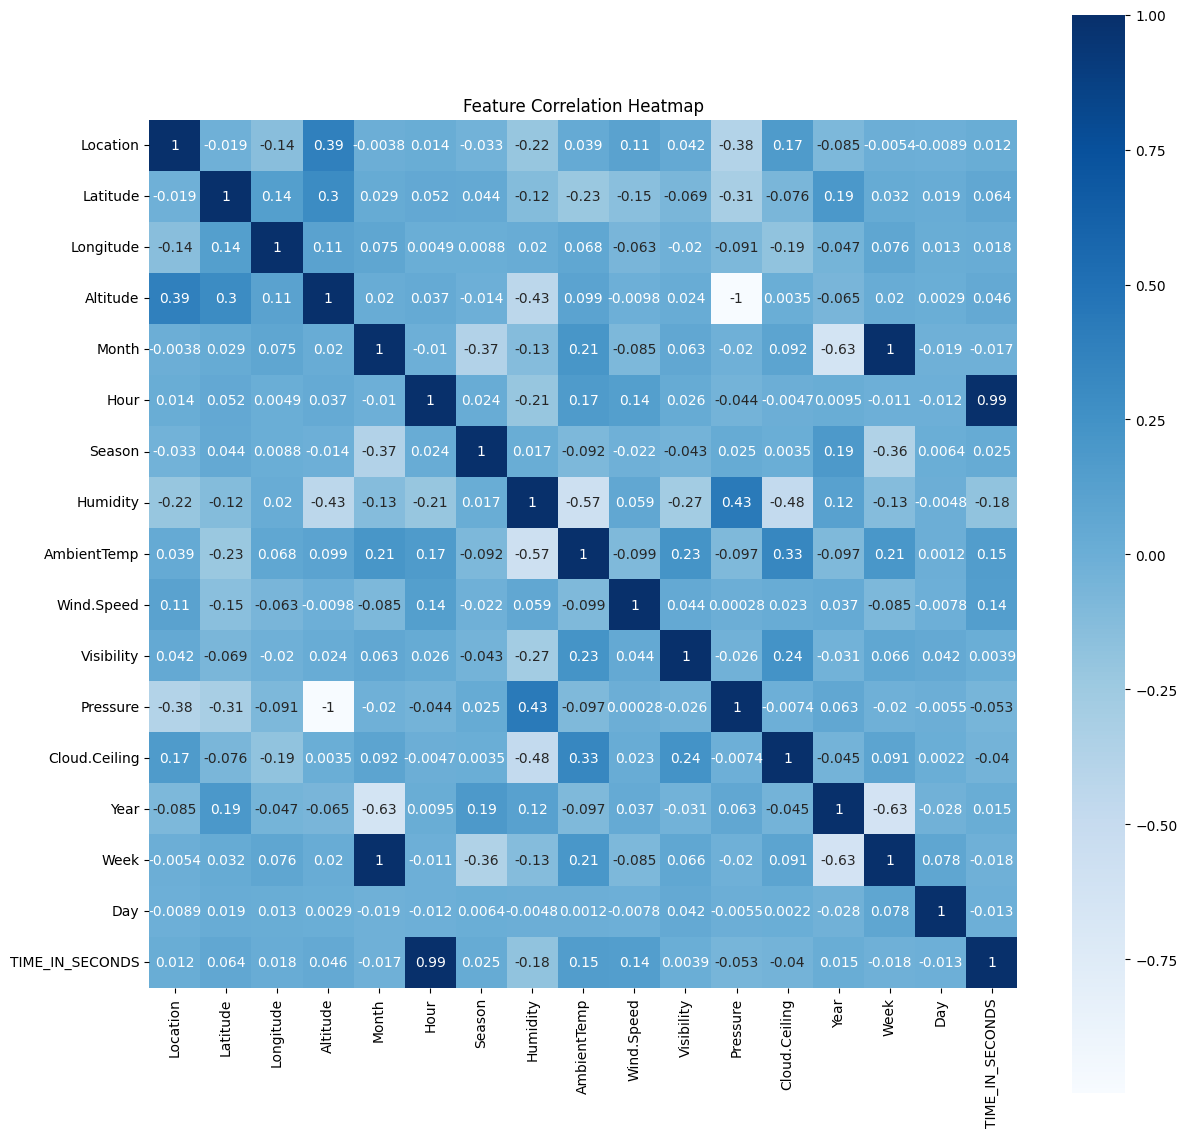

In [354]:
corr_df = X.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(corr_df, cbar=True, square=True, annot=True, cmap="Blues")
plt.title('Feature Correlation Heatmap')
plt.show()

#### Collinearity & Multicollinearity


**What is it?**

- **Collinearity** refers to the situation when two independent variables are correlated with one another.
- **Multicollinearity** is the situation where one independent variable can be expressed as a linear combination of two or more other independent variables (in other words, the independent variables are in a linear relationship with *each other*).

**What does it do to our models?**

- When two or more predictor variables in a regression model are highly correlated, meaning that they contain similar information about the variance of the dependent variable. This can affect the performance and interpretation of various machine learning models.

Looking at correlation values greater than 0.7:

* Altitude is highly correlated with Pressure, so Altitude will be dropped.
* Month is highly correlated with Week, so Month will be dropped.
* Hour is highly correlated with Time_In_Seconds, so Hour will be dropped.



In [355]:
X.drop(columns = ['Altitude','Month','Hour'], inplace=True)

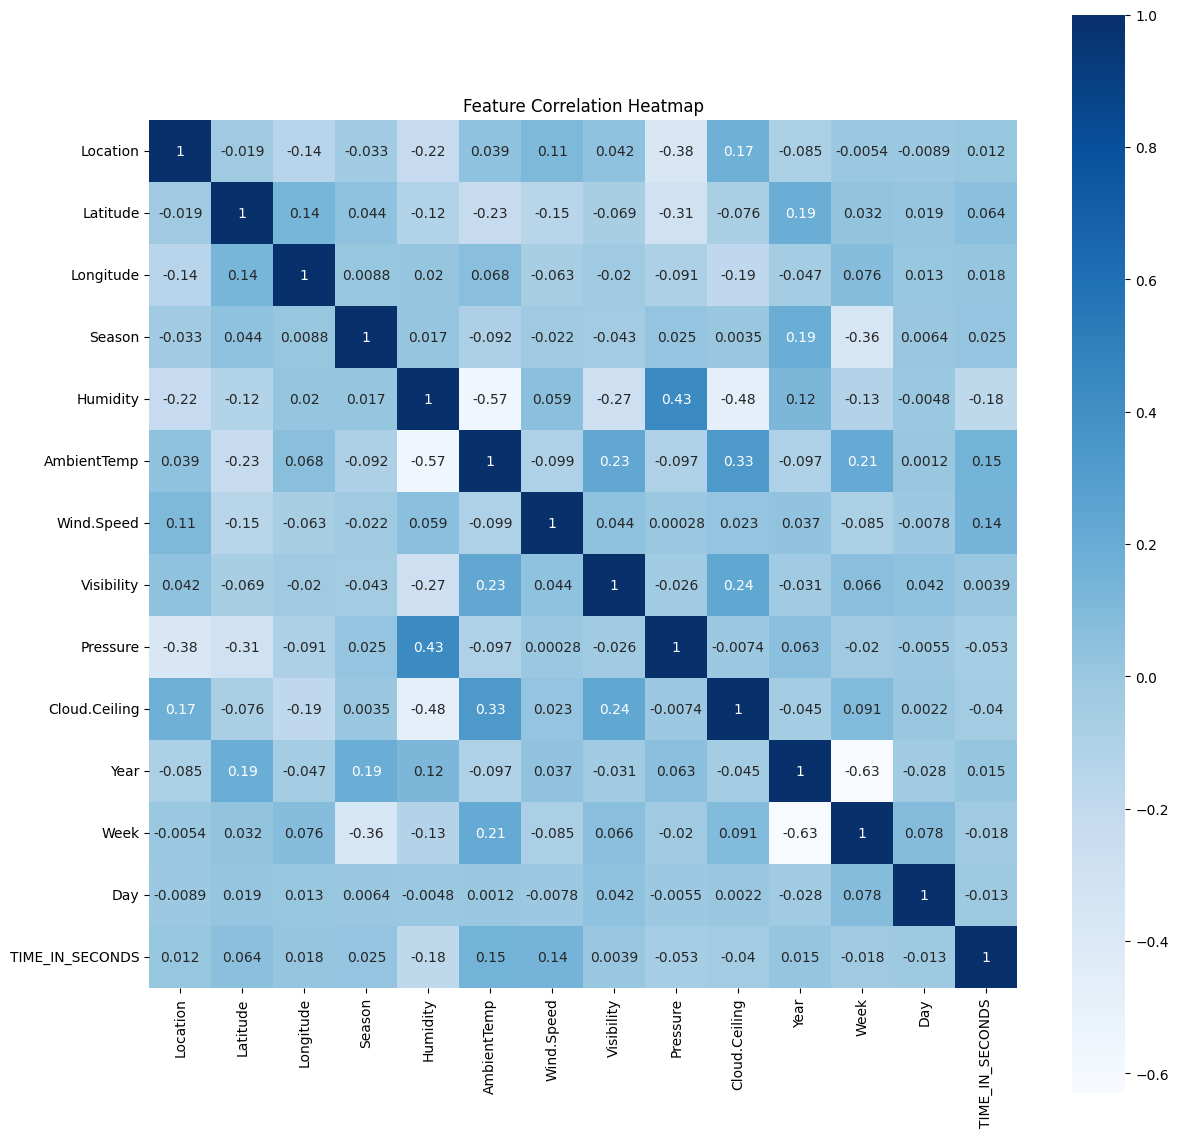

In [419]:
corr_df = X.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(corr_df, cbar=True, square=True, annot=True, cmap="Blues")
plt.title('Feature Correlation Heatmap')
plt.show()

Separating dataset into testing and training dataset

In [420]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_test.shape, X_train.shape

((4209, 14), (16836, 14))

### Solar Prediction

Random forests

In [421]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score


# Initialize the Random Forest Regressor
model_RF = RandomForestRegressor(
    n_estimators= 500,
    max_depth = 20,
    min_samples_split = 4,
    min_samples_leaf= 2,
    max_features = 'sqrt'
)

# Fit the model to the training data
model_RF.fit(X_train, y_train)



# Perform cross-validation
cv_scores = cross_val_score(model_RF, X_train, y_train, cv=5, scoring='r2')

# Output the cross-validation scores
print(f'R^2 scores: {cv_scores}')
print(f'Average R^2: {cv_scores.mean():.4f}')


R^2 scores: [0.67769859 0.68417926 0.67436323 0.68466455 0.67981901]
Average R^2: 0.6801


In [422]:
# Make predictions on the test set
y_pred = model_RF.predict(X_test)

# Evaluate the model's performance on the test set
r2 = r2_score(y_test, y_pred)

print(f'R^2 score on the test set: {r2:.4f}')

R^2 score on the test set: 0.6856
